# HLT Project - Sentiment Analysis

The purpose of our project is to take as input product reviews collected from Amazon and be able to distinguish between positive and negative reviews.

Our idea is to attempt binary classification using only the review titles as input, such as *”Great CD”* or *”Batteries died within a year”*. Clearly, titles are usually short and impactful phrases. Therefore, we believe that these may be sufficient to effectively operate our classifier. However, we plan to extend this idea by also attempting classification using the entire reviews as input. Using the entire reviews entails processing longer sentences and greater computational effort, but it also provides more information and potentially higher accuracy. At this point, our plan is to compare the results of these two classifiers using various metrics to determine which approach is more effective.

**Update**: We are including an additional potential task to implement. We have identified a second dataset that again would allow us to input product reviews from Amazon and classify them as positive or negative reviews. In this case, we could evaluate our algorithms on the two different datasets to assess their effectiveness.


# Import Libraries

As a first step we import all the libraries that we will use in the course of our work.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Utility Functions

As a second step we define some utility functions that we will use during the course of the notebook. Most of these functions will be used to plot different types of graphs, useful especially in the analysis part. We also include some functions that we use in the text cleaning part.

### Bar Chart

In [3]:
# Create a bar chart
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
        
    if xscale is not None:
        plt.xscale(xscale)
    
    if yscale is not None:
        plt.yscale(yscale)

    if show_grid:
        plt.grid(True)

    plt.show()

### Histogram Plot

In [4]:
# Create a histogram
def sea_histogram(dataframe_to_plot, column_of_interest, figsize=(8,10), title=None, xlabel=None, 
                  ylabel=None, hue=None, palette="deep", stat="count", binwidth=None,
                  multiple="layer", element="step", fill=True, shrink=1, kde=False, color="blue", 
                  log_scale=None, ylog=False, xlog=False, show_grid=False):

    plt.figure(figsize=figsize)
    
    if hue:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, hue=hue, stat=stat, 
                     binwidth=binwidth, multiple=multiple, element=element, fill=fill, 
                     shrink=shrink, kde=kde, palette=palette, log_scale=log_scale)
    else:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, stat=stat, 
                     binwidth=binwidth, element=element, fill=fill,
                     shrink=shrink, kde=kde, color=color, log_scale=log_scale)
        
    if ylog:
        plt.yscale("log")

    if xlog:
        plt.xscale("log")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

### Pie Plot

In [5]:
# Create a pie plot
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    plt.figure(figsize=figsize)
    
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()

### Box Plot

In [6]:
# Create a boxplot
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None):

    data_frame.boxplot(column=columns_of_interest, whis=whis)
    
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title) 
    plt.show()  

### WordCloud

In [7]:
# Create WordCloud with text of reviews
def wordcloud_fun(dataset, data_to_plot, figsize=(20,20), max_words=2000,
                  min_font_size=10, height=800, width=1600, background_color="white"):
    
    plt.figure(figsize=figsize)
    wc = WordCloud(max_words=max_words, min_font_size=min_font_size, height=height, width=width, 
                   background_color=background_color).generate(" ".join(dataset[data_to_plot]))
    plt.imshow(wc)
    plt.axis('off')  # Remove the axis
    plt.show()

### Clean Text

In [8]:
# Create a function that delete special characters from text and bring it all to lower case
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("_", " ")
    df[field] = df[field].str.replace("-", " ")
    df[field] = df[field].str.replace(r'http\S*', '', regex=True)
    df[field] = df[field].str.replace(r"[^a-zA-Z0-9(),\"'\n\s.!?;:\[\]/%]", "", regex=True)
    df[field] = df[field].str.lower()
    return df

# Load Dataset

The **Amazon Reviews** dataset consists of reviews from Amazon. We then load this first dataset, which we save in the **df** dataframe.

In [11]:
df = pd.read_csv("../Datasets/train.csv", header=None, names=["polarity", "title", "text"])

The datasets contains 3 different columns: *polarity*, *title*, *text*. Here’s a brief description of these features:

- *polarity*: In this column, a number between 1 and 2 is written. In constructing the dataset, the label 1 was inserted for all negative reviews (those with 1 or 2 stars), while the label 2 was inserted for all positive reviews (4 or 5 stars). Reviews with 3 stars were ignored. 
- *title*: It contains the titles of the reviews.
- *text*: It contains the entire text of each review.

In [12]:
df.head()

polarity                                              title  \
0         2                     Stuning even for the non-gamer   
1         2              The best soundtrack ever to anything.   
2         2                                           Amazing!   
3         2                               Excellent Soundtrack   
4         2  Remember, Pull Your Jaw Off The Floor After He...   

                                                text  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...

Let us print some information about this dataframe.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


# Cleaning Dataset

At this point move on to cleaning our dataset. As a first step we see if there are duplicate rows, but we do not find any duplicates to delete.

In [14]:
Duplicated_raws=df.duplicated()
print("The total number of duplicate rows are", Duplicated_raws.sum())
#Dataset_1_train=df.drop_duplicates() #in case of duplicates

The total number of duplicate rows are 0


Let us now check whether there are some null elements in some columns. 

As we can see, there are 207 null elements in the *title* column. Since we have to use this column during our analysis, we cannot have null elements. We are therefore going to delete the rows with null elements.

In [15]:
df.isna().sum()

polarity      0
title       207
text          0
dtype: int64

In [16]:
df=df.dropna()
df.isna().sum()

polarity    0
title       0
text        0
dtype: int64

We now go on to clean the text of special characters and also switch all uppercase to lowercase: in fact, our model will be able to work with lowercase. We will use the **clean_text** function defined in the Utility Function section.

In [17]:
clean_text(df,"title")
clean_text(df, "text")

df.head()

polarity                                              title  \
0         2                     stuning even for the non gamer   
1         2              the best soundtrack ever to anything.   
2         2                                           amazing!   
3         2                               excellent soundtrack   
4         2  remember, pull your jaw off the floor after he...   

                                                text  
0  this sound track was beautiful! it paints the ...  
1  i'm reading a lot of reviews saying that this ...  
2  this soundtrack is my favorite music of all ti...  
3  i truly like this soundtrack and i enjoy video...  
4  if you've played the game, you know how divine...

## Exploring Dataset

In [18]:
df.shape

(3599793, 3)

Let us look at the distribution of values in the *polarity* column. As we see these values are practically balanced.

In [19]:
df.polarity.value_counts()

polarity
2    1799913
1    1799880
Name: count, dtype: int64

In [20]:
rows_to_drop = df[df['polarity'] == 2].index
rows_to_drop = np.random.choice(rows_to_drop, size=33, replace=False)
df = df.drop(rows_to_drop)

df.polarity.value_counts()

polarity
2    1799880
1    1799880
Name: count, dtype: int64

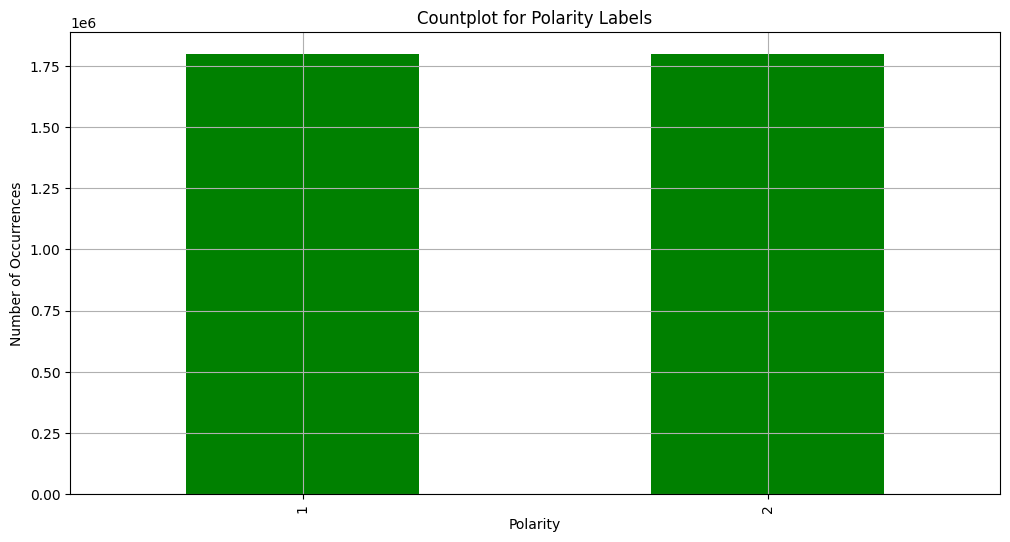

In [21]:
data_by_polarity = df.groupby('polarity').size()

barchart_func(data_to_plot=data_by_polarity,
              ticksrange=range(len(data_by_polarity)),
              ticksname=data_by_polarity.index,
              title='Countplot for Polarity Labels',
              xlabel="Polarity",
              ylabel="Number of Occurrences",
              color="green",
              rotation=90,
              #yscale=None,
              show_grid=True)

### WordClouds on Reviews

Now we use **WordClouds**, that is useful for viewing and analyzing words that are frequently used. We first do that analysis on data with polarity equal to 1, so with bad reviews, and then to data with polarity equal to 2.

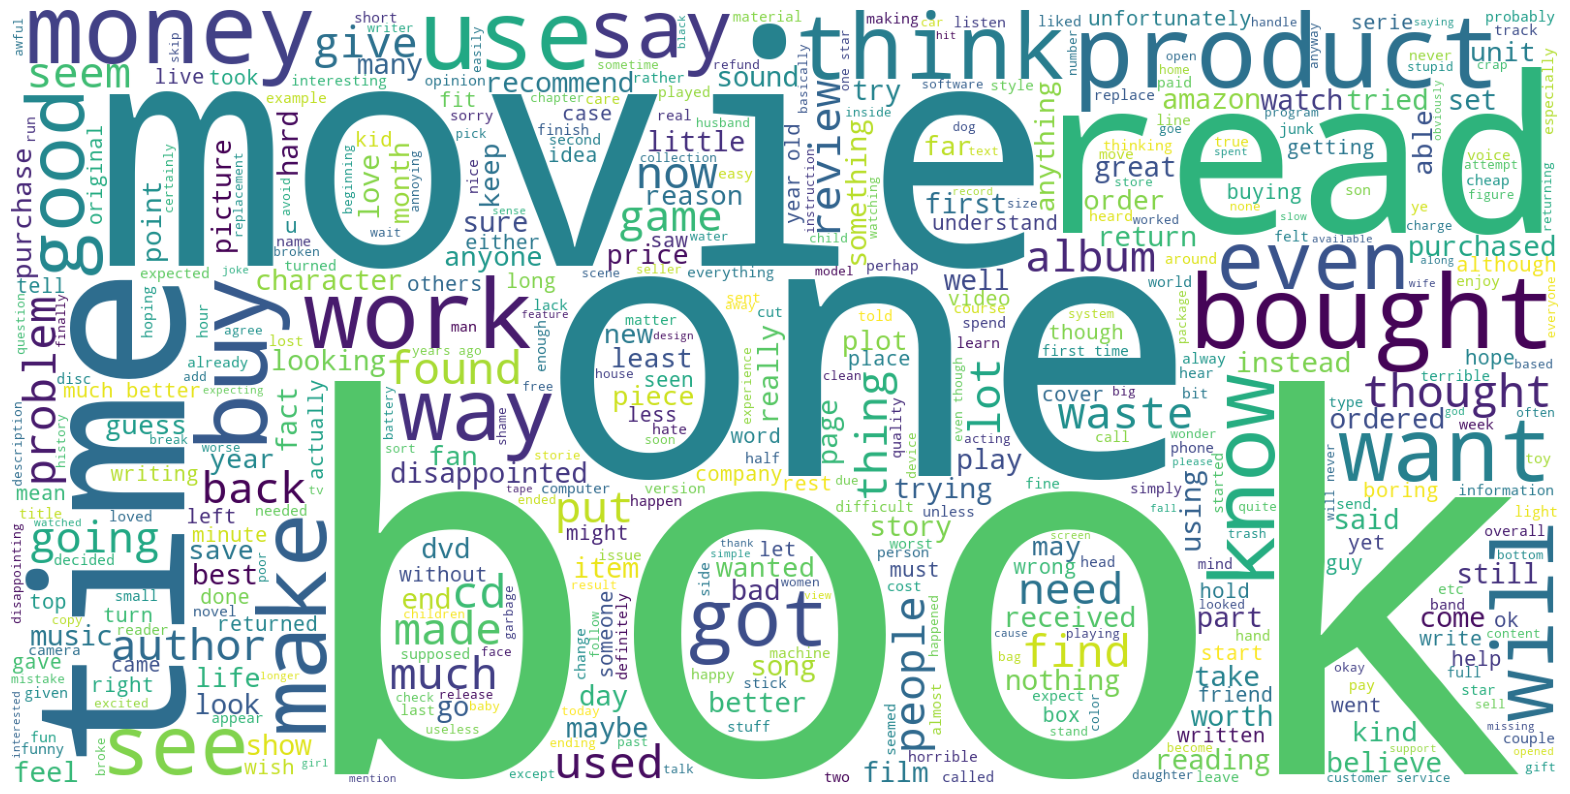

In [22]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 1]

wordcloud_fun(filtered_df, "text")

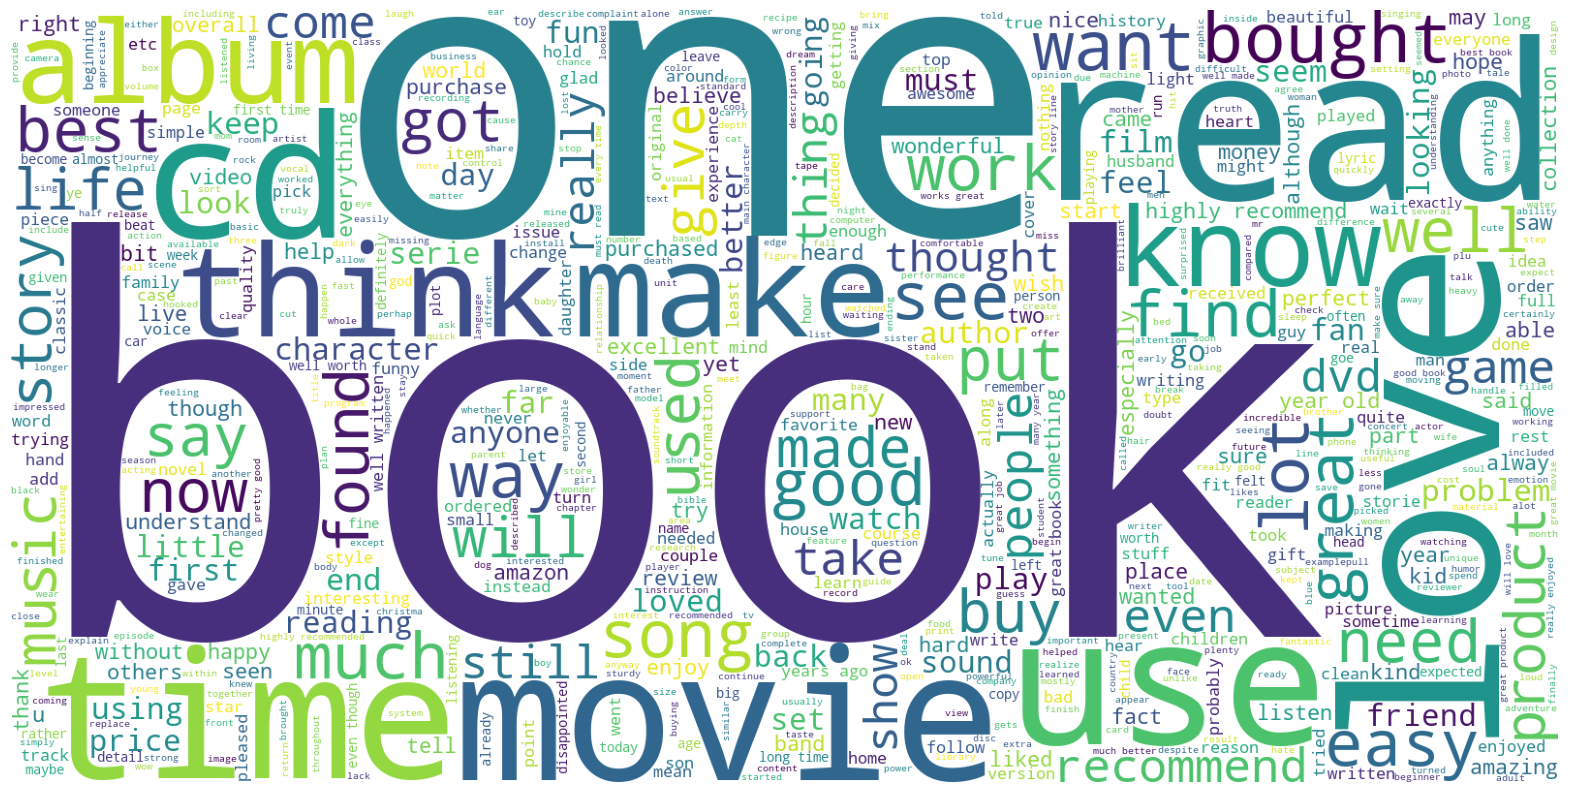

In [23]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 2]

wordcloud_fun(filtered_df, "text")

### WordClouds on Titles

We do the same operation as before, but in this case we use titles instead of entire reviews. Again, we first use WordClouds only to data with polarity equal to 1, and then only for data with polarity equal to 2.

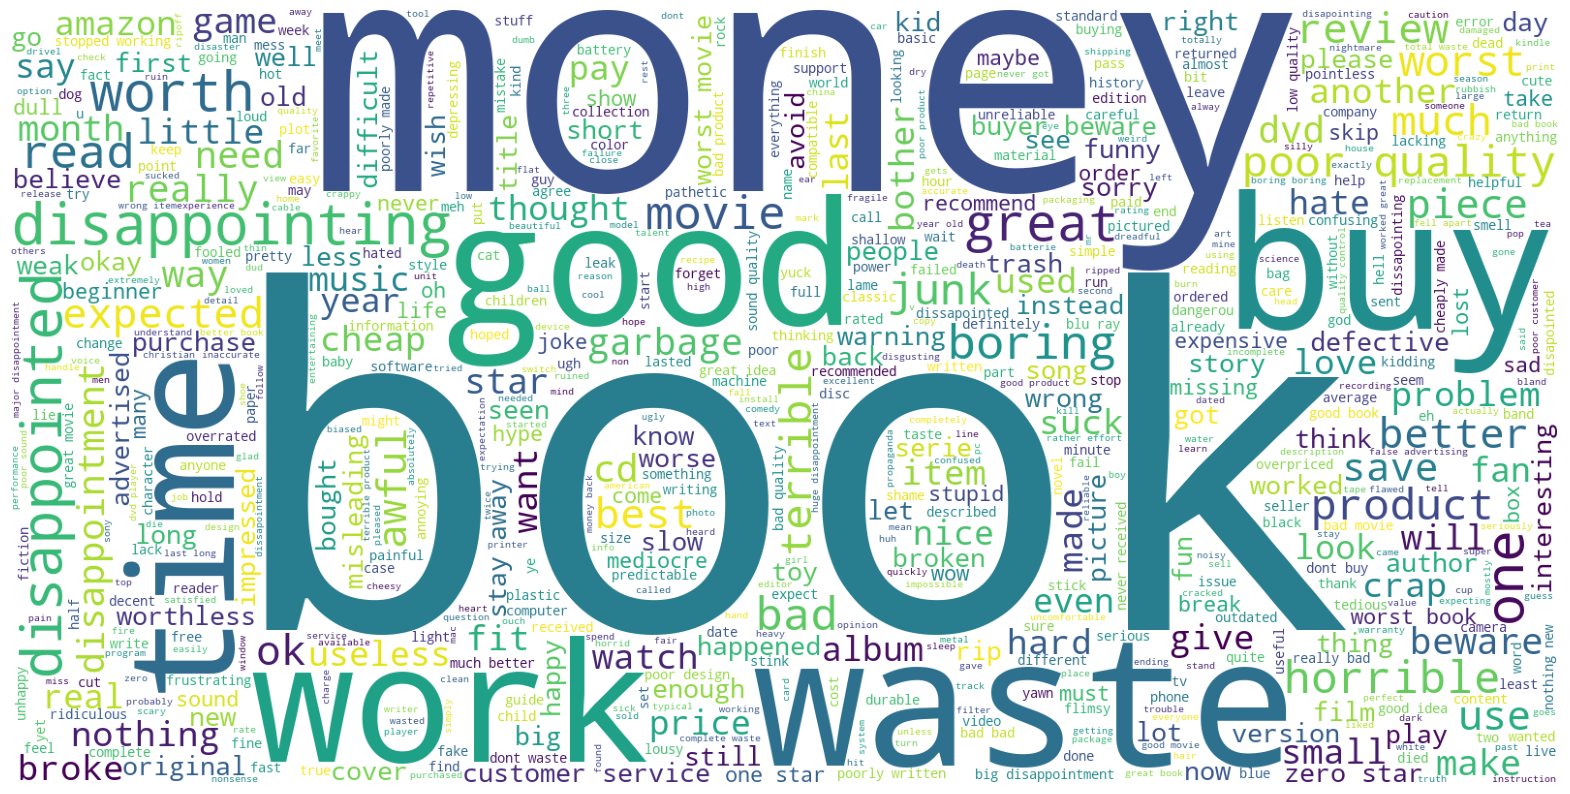

In [24]:
# Dataframe with polarity = 1
filtered_df = df[df['polarity'] == 1]

wordcloud_fun(filtered_df, "title")

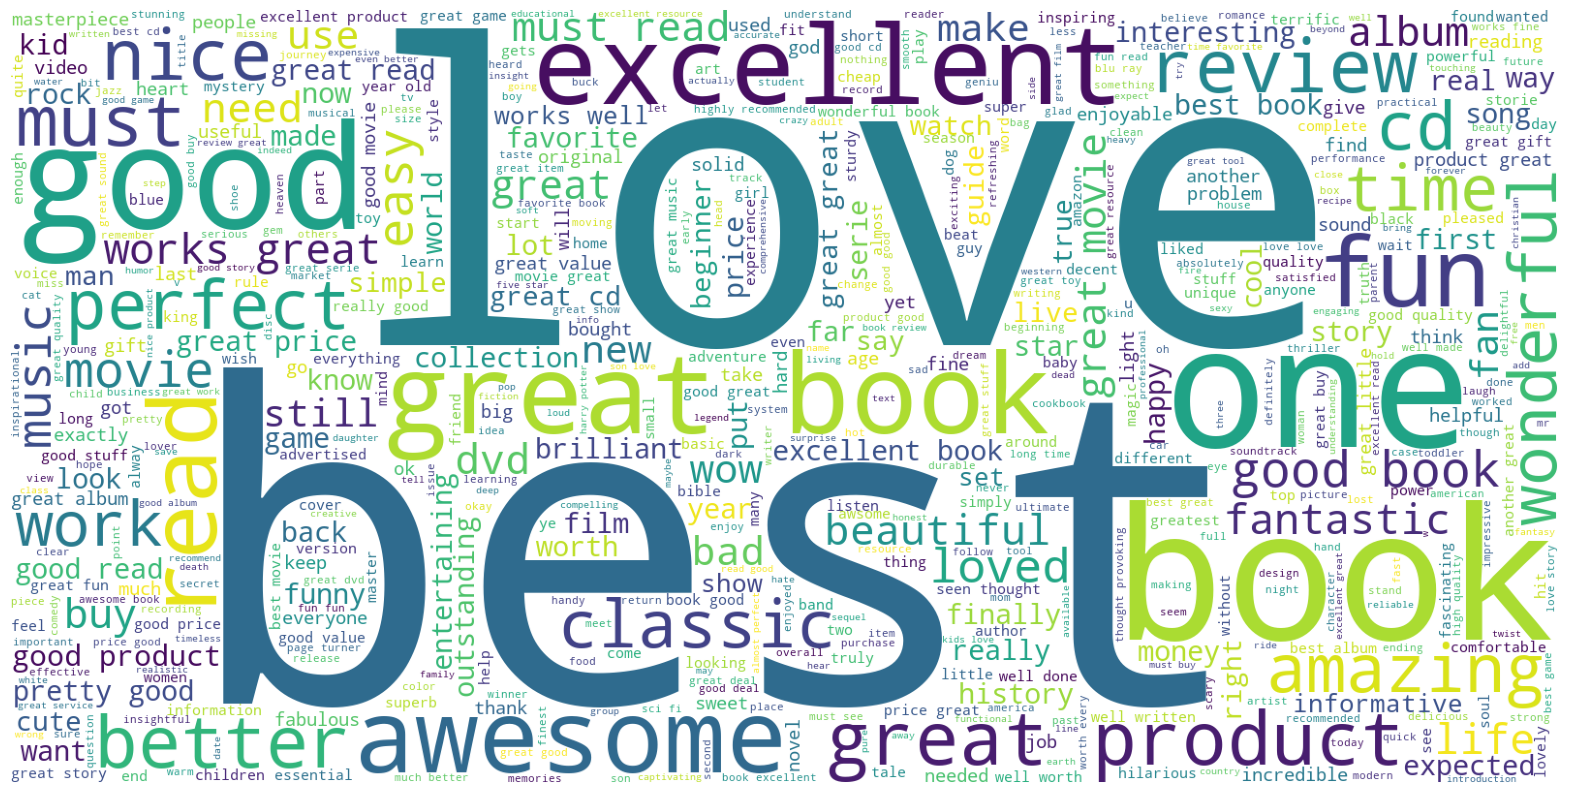

In [25]:
# Dataframe with polarity = 2
filtered_df = df[df['polarity'] == 2]

wordcloud_fun(filtered_df, "title")

#### Length of Text

In this section we want to analyze the length of titles and reviews in our dataset. 

We first create two new columns, *title_word_count* and *review_word_count*, in which we respectively store the number of words in each title and the number of words in each review.

In [26]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split(' ')))
df['review_word_count'] = df['text'].apply(lambda x: len(x.split(' ')))

We first visualize the distributions of these new two columns plotting histograms using the **sea_histogram** function defined in the Utility Function section. 

*Title_word_count*: here we can see, through the first figure, how titles that have 2 to 5 words represent the most significant cases, and how the number of occurrences of titles with more than 5 words drops exponentially as the length of the title increases. 

In the second figure we print the same distribution, but using a logarithmic scale on the y-axis. We can see how, using the logarithmic scale, the descent of the figure is linear, and therefore exponential in the actual distribution (the one without the logarithmic scale).

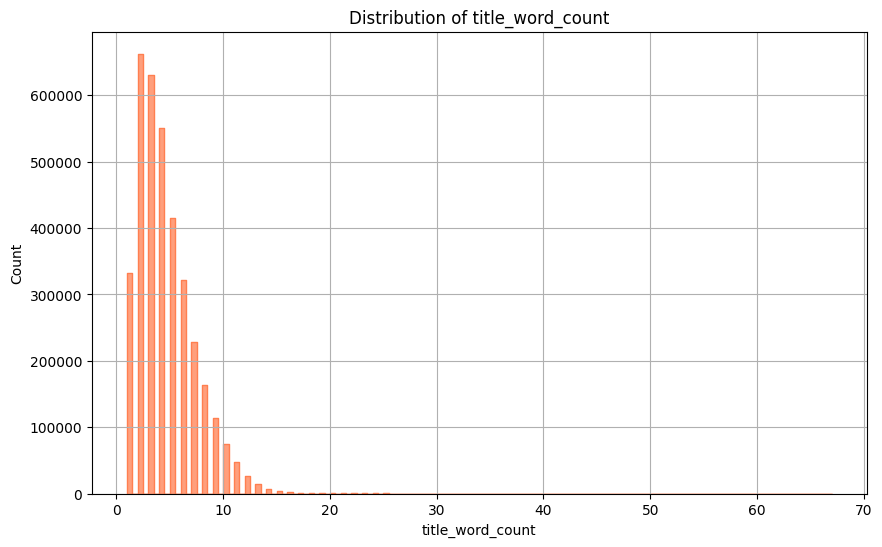

In [27]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              show_grid=True)

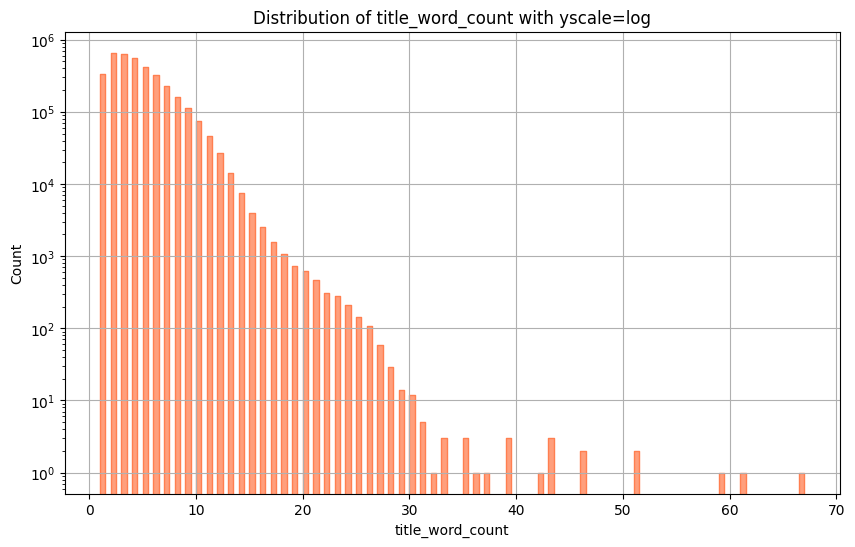

In [28]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count with yscale=log",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              binwidth=0.5,
              element="step",
              color="coral",
              ylog=True,
              show_grid=True)

*Review_word_count*: in the case of whole reviews, on the other hand, we see how the peak is for reviews about 20 words long. The descent of the curve shown in the figure is linear for reviews with more than 20 words: as the length of the reviews increases, the number of occurrences decreases linearly. For reviews shorter than 20 words in length, on the other hand, we have a super exponential decrease.

In the second figure we show the same graph, but studying its probability distribution, indicated both on the y-axis and by the curve visible in the figure.

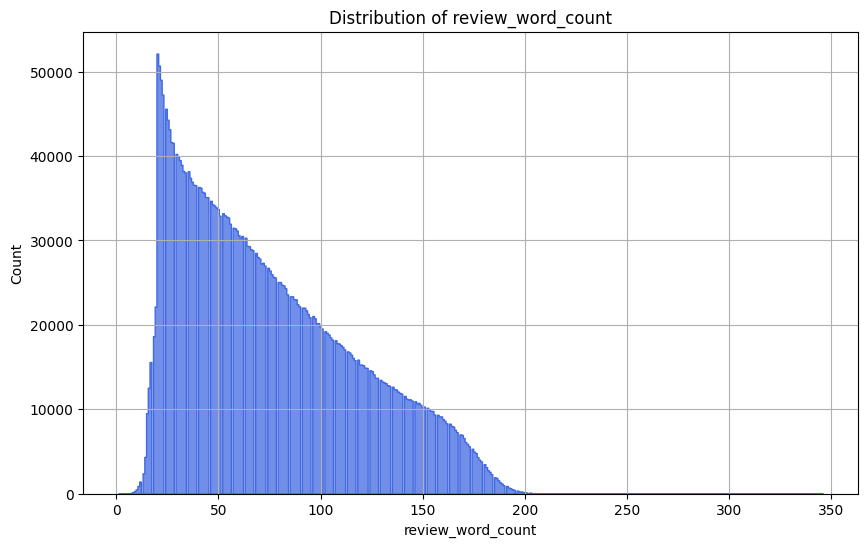

In [29]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              color="royalblue",
              show_grid=True)

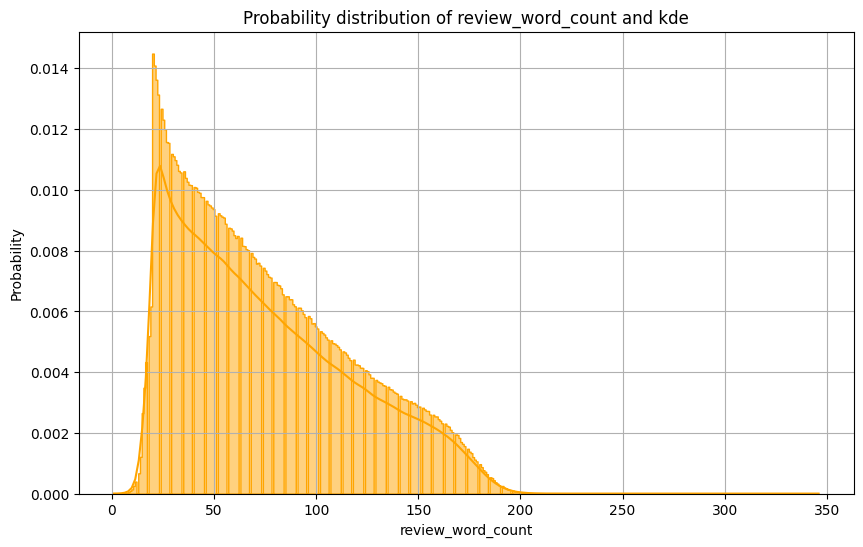

In [30]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Probability distribution of review_word_count and kde",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Probability",
              stat="probability",
              kde=True,
              color="orange",
              show_grid=True)

At this we print box plots for both columns to show another side of the distribution. We print the box plots with both linear and logarithmic scaling on the y-axis. 

From the figures we can see how the linear descent on the length of whole reviews causes no outliers to be detected in the *review_word_count* column. In contrast, the exponential descent on the occurrences of long titles causes the box plots to detect several outliers.

We decide not to eliminate these outliers, however, and use them for our classification task.

In [31]:
columns_of_interest=["title_word_count", "review_word_count"]

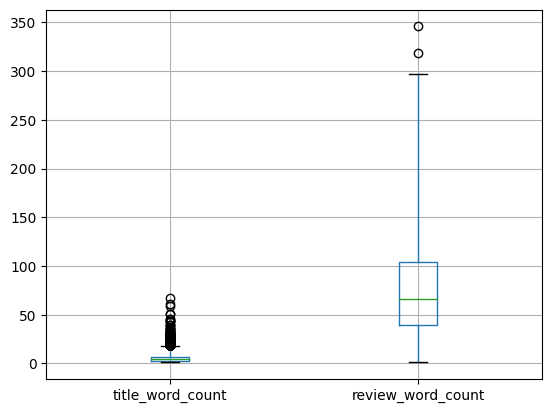

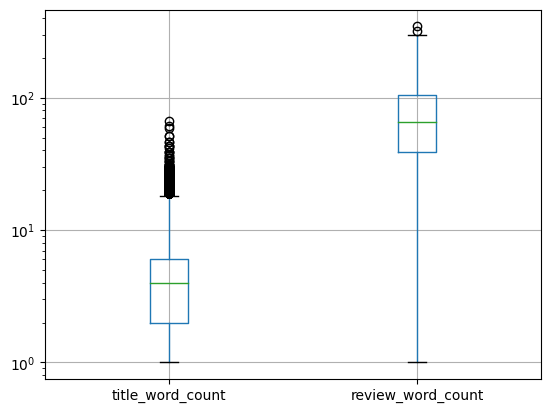

In [32]:
boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=df, 
             whis=3)

boxplot_func(columns_of_interest=columns_of_interest, 
             data_frame=df, 
             whis=3, 
             yscale="log")

At this point we ask, "*Is there a correlation between the length of reviews (or titles) and whether they are positive or not?*" For example, could it be the case that positive reviews, i.e., those associated with label 2 in the polarity column, are on average longer than negative reviews?

To answer this question we then printed histograms again, showing the distribution of the length of titles and reviews, i.e., the *title_word_count* and *review_word_count* columns, divided according to the labels in the *polarity* column. 

Looking at the graphs results the answer to our question was therefore: no. In fact, in this dataset the distribution of the length of titles and reviews is almost identical for both positive reviews (polarity=2) and negative reviews (polarity=1).

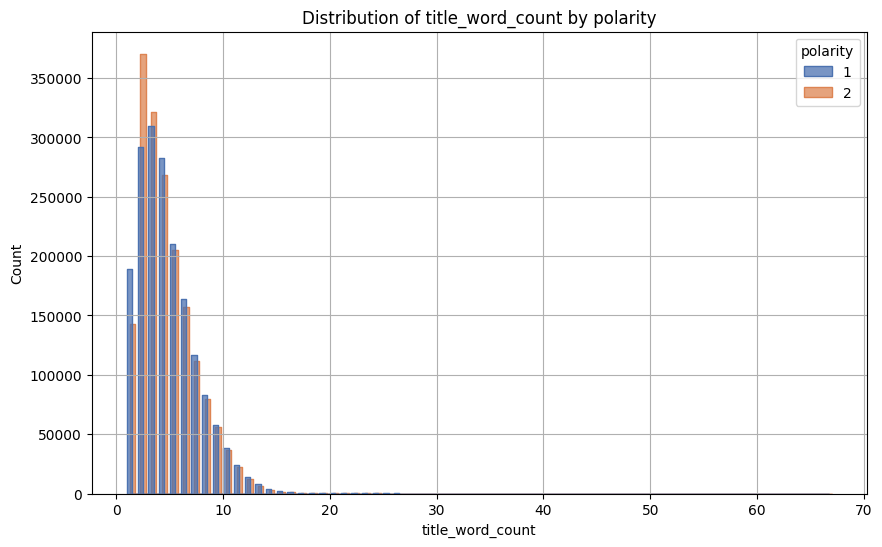

In [33]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="title_word_count", 
              title="Distribution of title_word_count by polarity",
              figsize=(10, 6),
              xlabel="title_word_count",
              ylabel="Count",
              hue="polarity",
              binwidth=0.5,
              multiple="dodge",
              element="step",
              #ylog=True,
              show_grid=True)

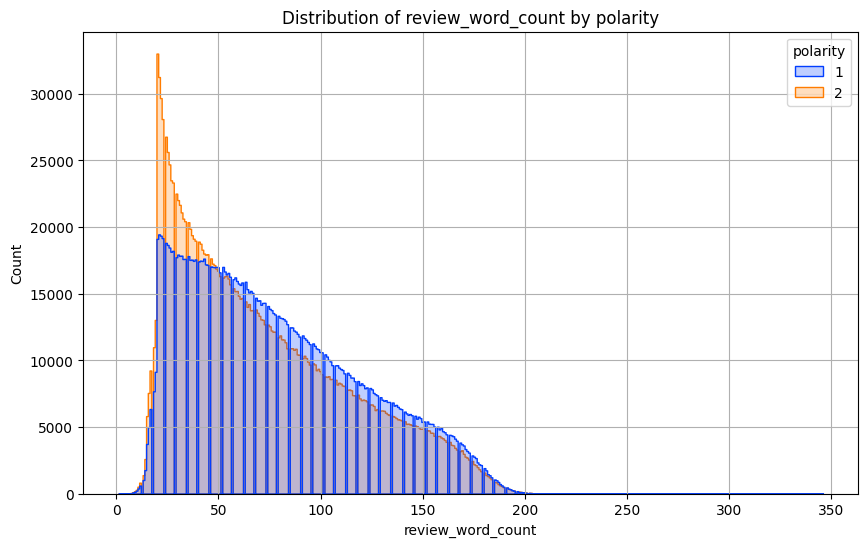

In [35]:
sea_histogram(dataframe_to_plot=df, 
              column_of_interest="review_word_count", 
              title="Distribution of review_word_count by polarity",
              figsize=(10, 6),
              xlabel="review_word_count",
              ylabel="Count",
              hue="polarity",
              palette="bright",
              element="step",
              color="green",
              show_grid=True)

Finally, we remove the two columns defined at the beginning of the section, as we will not need them in future analyses.

In [36]:
df=df.drop(columns=["title_word_count", "review_word_count"])

# Storing Cleaned Datasets in csv Files

In [37]:
#Get the directory of the script
script_directory = os.getcwd()

#Specify the folder name
folder_name = '../Datasets/Cleaned_Dataset'

#Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

#Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

df.to_csv(path_or_buf=f'{folder_name}/Dataset_cleaned.csv', index=False)

### Reducing Size of Datasets

In [71]:
num_polarity_1 = (df['polarity'] == 1).sum()
num_polarity_2 = (df['polarity'] == 2).sum()

sample_polarity_1 = df[df['polarity'] == 1].sample(n=100000)
sample_polarity_2 = df[df['polarity'] == 2].sample(n=100000)

new_df = pd.concat([sample_polarity_1, sample_polarity_2])

In [72]:
new_df = new_df.reset_index(drop=True)

In [76]:
new_df.isna().sum()

polarity    0
title       0
text        0
dtype: int64

In [78]:
#Get the directory of the script
script_directory = os.getcwd()

#Specify the folder name
folder_name = '../Final_Dataset'

#Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

#Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

new_df.to_csv(path_or_buf=f'{folder_name}/Dataset_final.csv', index=False)